# The 2021 Dutch Grand Prix

The first Dutch Grand Prix since 1985. Even though this race did not have too many overtakes, there still was a lot going on and the atmosphere was amazing.

A very memorable thing from this weekend was Bottas setting the fastest lap towards the end of the race, while explicitly being told by his team not to go for the fastest lap (according to Bottas, he was “just playing around”).

So, why not dive into the telemetry of both Hamilton and Bottas’ fastest laps, to see what exactly the differences were?

## Comparing Hamilton and Bottas’ fastest laps

### Step 1: Set up the basics

In [1]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd

# Enable the cache
ff1.Cache.enable_cache('/home/ilazza/Documenti/Formula1_Data_Analysis/cache') 

# Setup plotting
plotting.setup_mpl()

# Get rid of some pandas warnings that are not relevant for us at the moment
pd.options.mode.chained_assignment = None

### Step 2: Collect the data

The first step to take is specifying the session we’re interested in. We specify the year, the race (could be either the circuit or the race name), and the session (could range from “FP1” to “Q” and “R”).

In [2]:
# Load the session data

race = ff1.get_session(2021, 'Zandvoort', 'R')

#Get the laps including telemetry
laps = race.load_laps(with_telemetry=True)

#Selecting only the one in which we are interested in (Hamilton and Bottas)
laps_ham = laps.pick_driver('HAM')     #built-in mask laps[laps["Driver"]=="HAM"]
laps_bot = laps.pick_driver('BOT')

core           INFO 	Loading laps for Dutch Grand Prix - Race [v2.1.12]
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching track stat

Now that we have an entire dataset of all laps that were completed during the race, we can zoom in a little. Since we’re only interested the fastest laps from Hamilton and Bottas, we do the following:

In [12]:
# Extract the fastest laps


fastest_bot = laps_bot.pick_fastest()
fastest_ham = laps_ham.pick_fastest()

In [15]:
fastest_ham

Time                      0 days 02:32:34.970000
DriverNumber                                  44
LapTime                   0 days 00:01:11.097000
LapNumber                                     72
Stint                                          4
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:24.776000
Sector2Time               0 days 00:00:24.328000
Sector3Time               0 days 00:00:21.993000
Sector1SessionTime        0 days 02:31:48.649000
Sector2SessionTime        0 days 02:32:12.977000
Sector3SessionTime        0 days 02:32:34.970000
SpeedI1                                    281.0
SpeedI2                                    276.0
SpeedFL                                    294.0
SpeedST                                      NaN
Compound                                    SOFT
TyreLife                                     3.0
FreshTyre                                  False
LapStartTime        

These functionalities are conveniently built-in by fastf1, but basically they just perform some selections within the DataFrame.


If you have a look at the variables `fastest_bot` and `fastest_ham` , you’ll notice that there is no telemetry data yet. To include this, we will have to take one more step:

In [16]:
#Get the telemetry from fastest laps

telemetry_bot = fastest_bot.get_car_data().add_distance()
telemetry_ham = fastest_ham.get_car_data().add_distance()

From the fastest laps, we load the car data which consists of many telemetry variables like `Speed` , `Throttle` and `Brakes`. Another variable we want to have is the `Distance`, since we can use this as the variable on the X-axis.

### Step 3: Plot the data

Now that we’ve got everything in place, it is time to finally visualize the data! We use the `subplots` functionality from Matplotlib, which allows us to have multiple plots in a single figure. This is convenient for comparing multiple variables, like speed, throttle and brake.


- First of all, we define the subplots and set the title. Since we’re making three plots, we tell matplotlib that we will be having 3 subplots.


- After that, we can create the three subplots. One for speed, one for Throttle and one for Brake. All subplots are stored in the `ax` variable. For each subplot, we create two lines: one for Bottas and one for Hamilton.


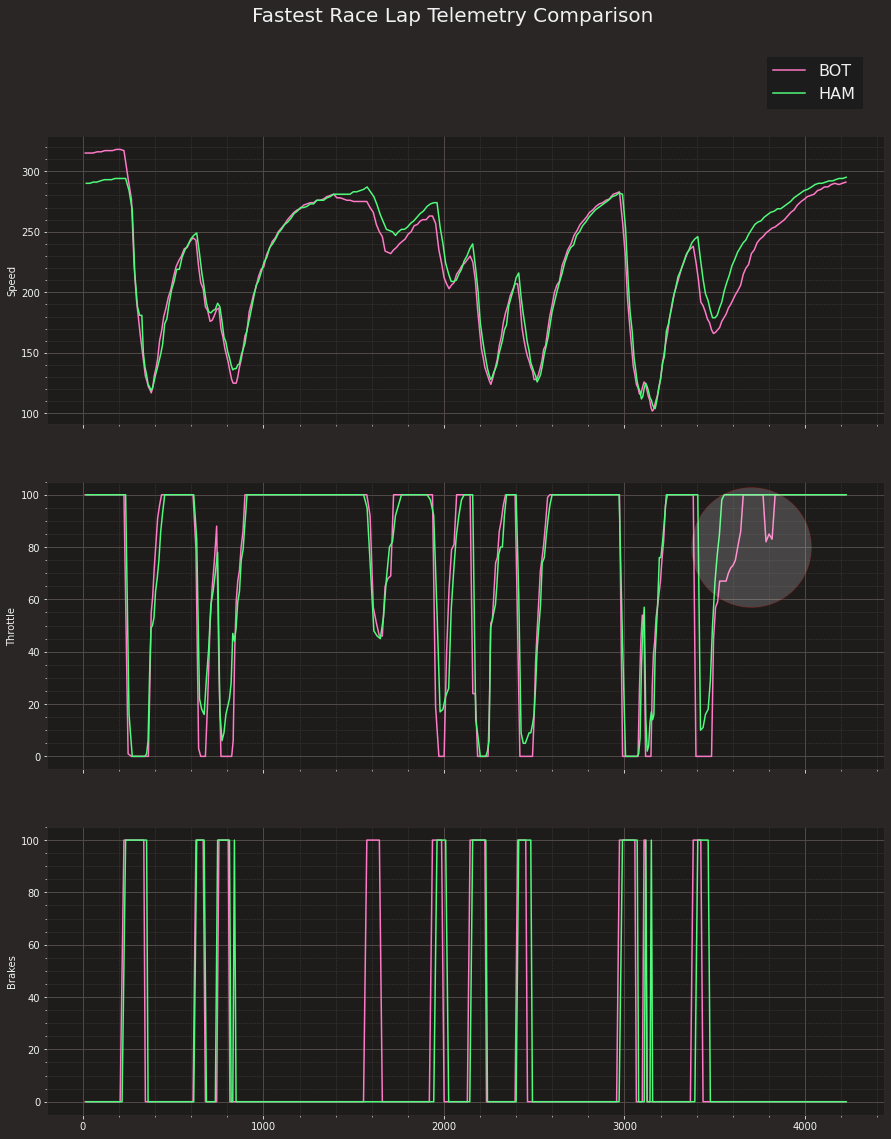

In [40]:

plt.rcParams['figure.figsize'] = [15, 18]

fig, ax = plt.subplots(3)

fig.suptitle("Fastest Race Lap Telemetry Comparison" , fontsize=20)

ax[0].plot(telemetry_bot['Distance'], telemetry_bot['Speed'], label='BOT')
ax[0].plot(telemetry_ham['Distance'], telemetry_ham['Speed'], label='HAM')
ax[0].set(ylabel='Speed')
ax[0].legend(loc=(0.86,1.1) , fontsize=16)


ax[1].plot(telemetry_bot['Distance'], telemetry_bot['Throttle'], label='BOT')
ax[1].plot(telemetry_ham['Distance'], telemetry_ham['Throttle'], label='HAM')
ax[1].set(ylabel='Throttle')

ax[1].plot(3700,80,marker='o',ms=120,mfc='w',mec='r', alpha=0.18)



ax[2].plot(telemetry_bot['Distance'], telemetry_bot['Brake'], label='BOT')
ax[2].plot(telemetry_ham['Distance'], telemetry_ham['Brake'], label='HAM')
ax[2].set(ylabel='Brakes')


# Hide x labels and tick labels for top plots and y ticks for right plots.

for a in ax.flat:
    a.label_outer()
    
plt.show()

## Step 4: Analyse the data

And finally, we have a plot displaying the telemetry data of both drivers during their fastest race lap. 

### “Valtteri, it’s James. Please abort the fastest lap attempt before the end of the lap”


Bottas was on his way to set the fastest lap, despite being told that they were not going for the fastest lap. 
During his attempt, Bottas was asked by James Vowles to abort his lap to make sure that Hamilton would get the extra point.


As visible in the telemetry data, Bottas only slightly backed of at the end of the lap (indeed, in the circled area Bottas raise his foot...).

This resulted in him setting the fastest lap (and raising some eyebrows here and there), while not making it too difficult for Hamilton to set the fastest lap in the end.
